## Preliminary Data Analysis

In [1]:
# import all necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.signal as signal
from IPython import display
import time

In [2]:
# load the data
db_data = pd.read_excel("LGS1_Overall_2023_minutes.xlsx", sheet_name="LGS#1 Aug 23")
db_data['Speed (RPM)'].mean()/60

4.5790245743727604

In [3]:
# checking all columns contains NaN
print(db_data.isnull().sum())
 
# clear all column with NaN input
db_data = db_data.dropna(axis=0)
db_data = db_data.dropna(axis=1)

TimeStamp                          0
Active Power (MW)                  0
Grid (Aux: 0 & FCE:1)              0
Reactive Power (MVAr)              0
Exc Voltage (Volt)                 0
Exc Current (A)                    0
V Phase 1 (Volt)                   0
V Phase 2 (Volt)                   0
V Phase 3 (Volt)                   0
Current Phase 1 (A)                0
Current Phase 2 (A)                0
Current Phase 3 (A)                0
Modbus MVAr                        0
Modbus MVA                         0
PF (Cos Phi)                       0
Freq (hz)                          0
Speed (RPM)                        0
WG Opening (%)                     0
Speed (RPM).1                      0
Penstock Pressure (Kg/cm2)         0
Penstoc Flow (Cumecs)              0
Turbine Flow (Cumecs)              0
Eff (Cumecs/MW)                    0
UGB X (µm)                         0
UGB Y (µm)                         0
LGB X (µm)                         0
LGB Y (µm)                         0
T

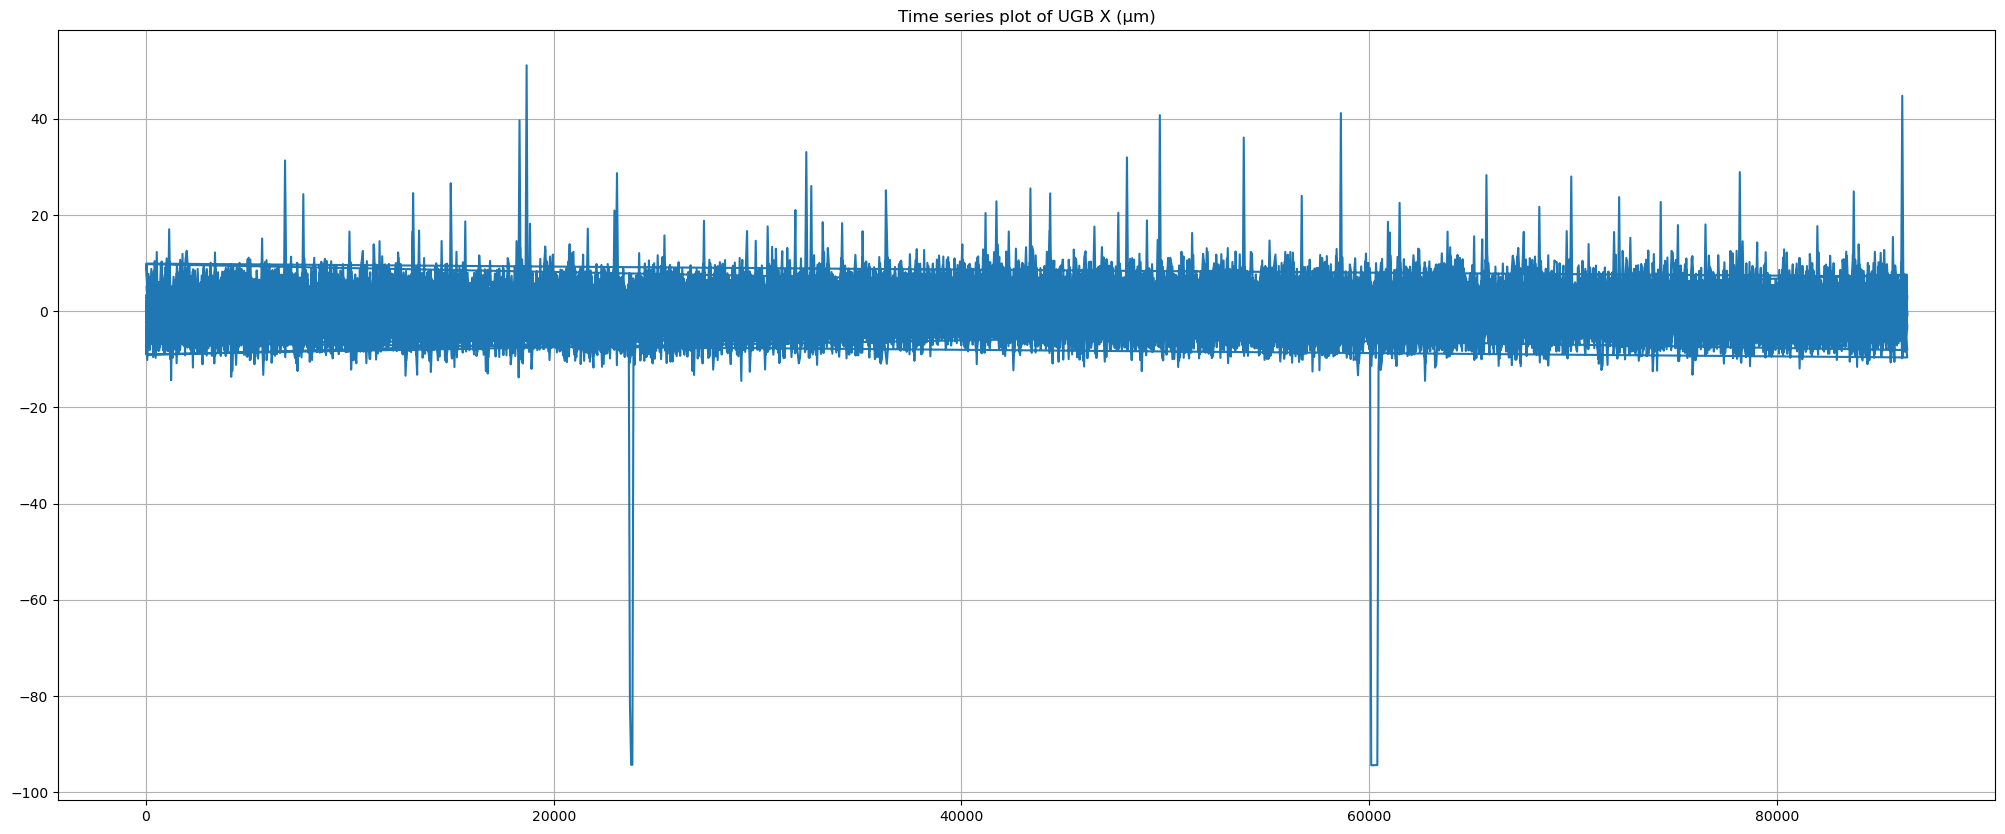

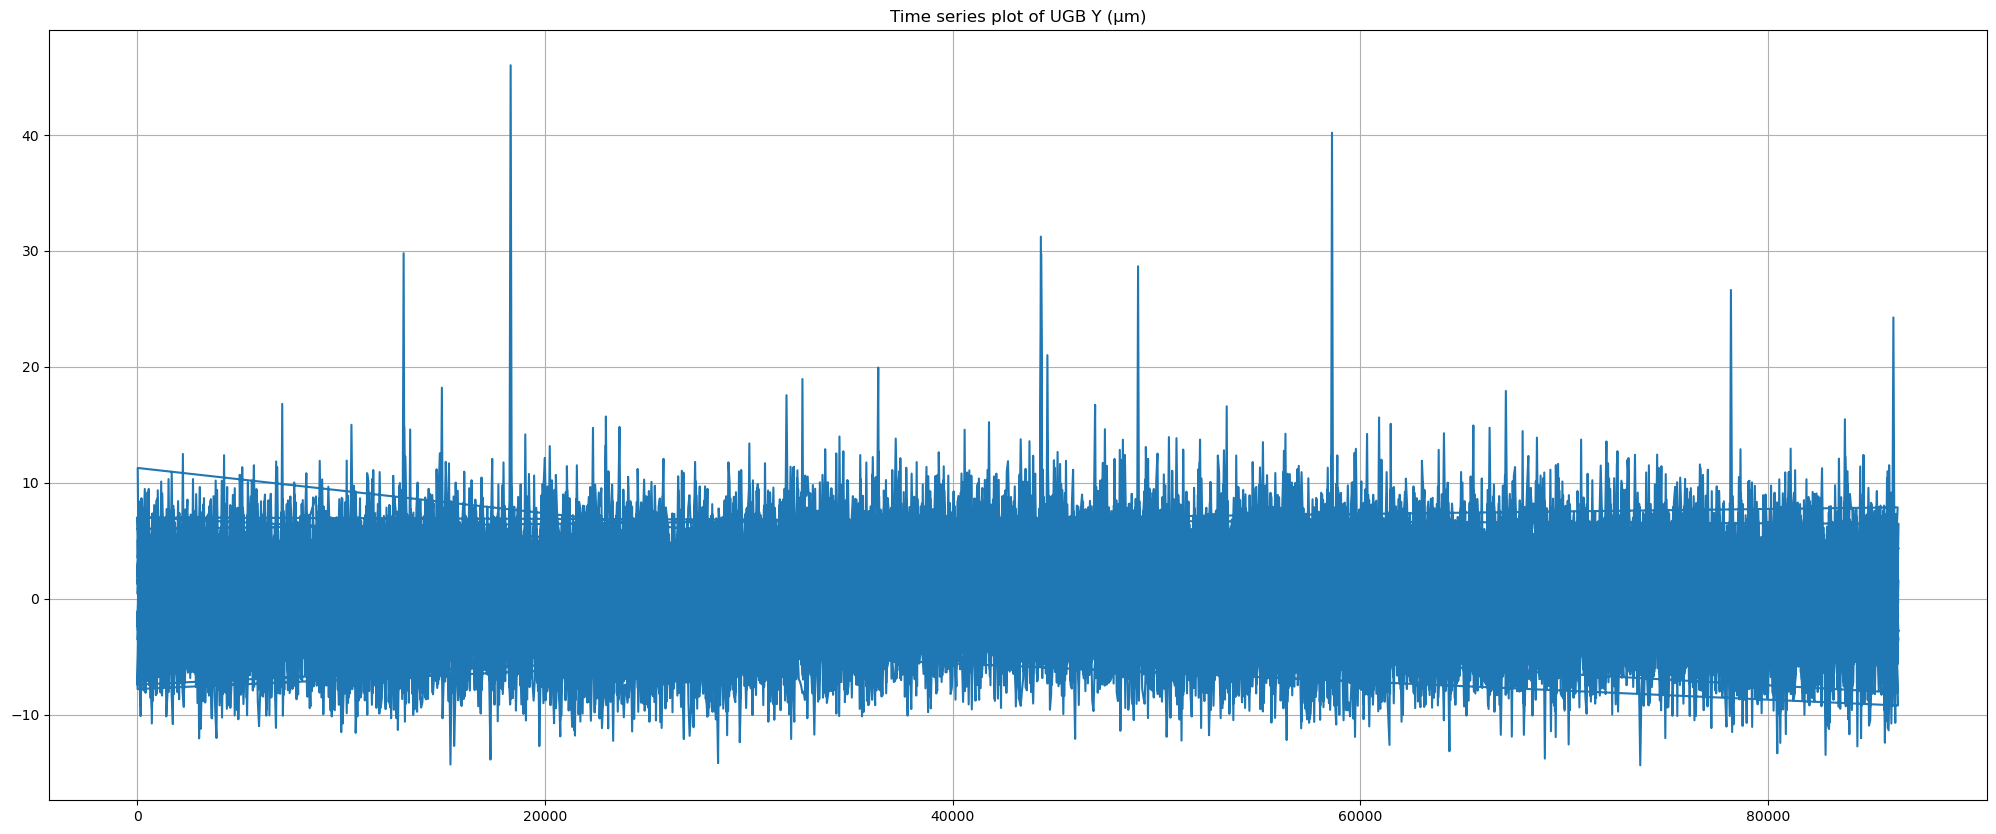

In [18]:
# plot time series of data
def plot_time_series(time_data, value_data):
    fig =  plt.figure(figsize=(25,10))
    ax = fig.add_subplot(111)
    ax.plot(time_data, value_data)
    ax.set_title("Time series plot of " + value_data.name)
    plt.grid()
    plt.show()

x_data = db_data['UGB X (µm)']/2
x_data = x_data - x_data.mean()

y_data = db_data['UGB Y (µm)']/2
y_data = y_data - y_data.mean()

time_data = db_data['TimeStamp'].dt.hour * 3600 + db_data['TimeStamp'].dt.minute * 60 + db_data['TimeStamp'].dt.second

plot_time_series(time_data, x_data)
plot_time_series(time_data, y_data)


In [22]:
time_data

0            1
1           61
2          121
3          181
4          241
         ...  
44635    86158
44636    86218
44637    86278
44638    86338
44639    86399
Name: TimeStamp, Length: 44640, dtype: int64

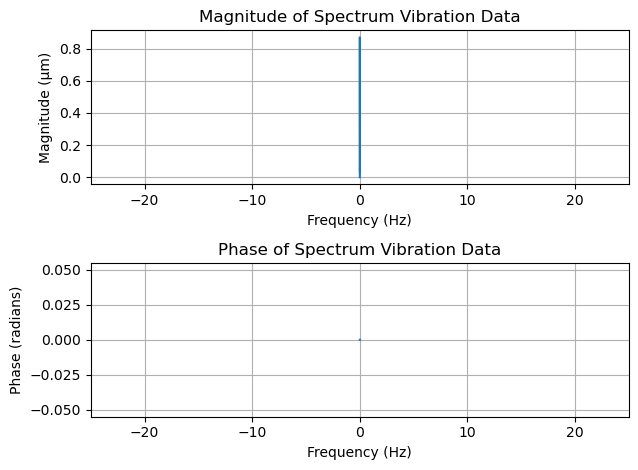

In [23]:
# define spectrum calculation of the displacement data
def fft_signal(time_data, value_data):
    # create window
    # win = np.hanning(len(value_data))
    value_data = value_data - np.mean(value_data)
    
    # create frequency axis data
    freq = np.fft.fftfreq(len(value_data), time_data[1]-time_data[0])

    # apply fft
    spec = (2/len(value_data)) * np.fft.fft(value_data)

    return freq, spec

def plot_spectrum(freq_data, spec_data):
    idx = int(len(freq_data)/2)
    amp = np.abs(spec_data)
    phase = np.angle(spec_data)

    phase[amp < 1] = 0

    fig = plt.figure()
    ax_amp = fig.add_subplot(211)
    ax_amp.plot(freq_data[:idx], amp[:idx])
    ax_amp.set_xlim([-25, 25])
    ax_amp.set_xlabel("Frequency (Hz)")
    ax_amp.set_ylabel(u"Magnitude (\u03bcm)")
    ax_amp.set_title("Magnitude of Spectrum Vibration Data")
    plt.grid(True)

    ax_phase = fig.add_subplot(212)
    ax_phase.plot(freq_data[:idx], phase[:idx])
    ax_phase.set_xlim([-25, 25])
    ax_phase.set_xlabel("Frequency (Hz)")
    ax_phase.set_ylabel(u"Phase (radians)")
    ax_phase.set_title("Phase of Spectrum Vibration Data")
    plt.grid(True)

    plt.tight_layout()

freq, spec = fft_signal(time_data, x_data)
plot_spectrum(freq, spec)

In [187]:
# resample function
def resample_data(time_data, value_data, n_samples):
    v_resampled, t_resampled = signal.resample(value_data, n_samples, time_data)
    v_resampled = pd.Series(v_resampled, name=value_data.name + '(Resampled)')
    t_resampled = pd.Series(t_resampled)

    return v_resampled, t_resampled 

# resample the vibration data
ugb_x = db_data['UGB X (µm)'][0:100]
ugb_y = db_data['UGB Y (µm)'][0:100]

ugb_x = ugb_x - np.mean(ugb_x)
ugb_y = ugb_y - np.mean(ugb_y)

time_data = db_data['TimeStamp'].dt.hour * 3600 + db_data['TimeStamp'].dt.minute * 60 + db_data['TimeStamp'].dt.second

n_samples = len(ugb_x) * 60 * 40 # change sampling from each minute to each second

ugb_x_resampled, time_data_resampled = resample_data(time_data, ugb_x, n_samples)
ugb_y_resampled, time_data_resampled = resample_data(time_data, ugb_y, n_samples)

#ugb_x_resampled, time_data_resampled = signal.resample(ugb_x, n_samples, time_data)
#ugb_y_resampled, time_data_resampled = signal.resample(ugb_y, n_samples, time_data)

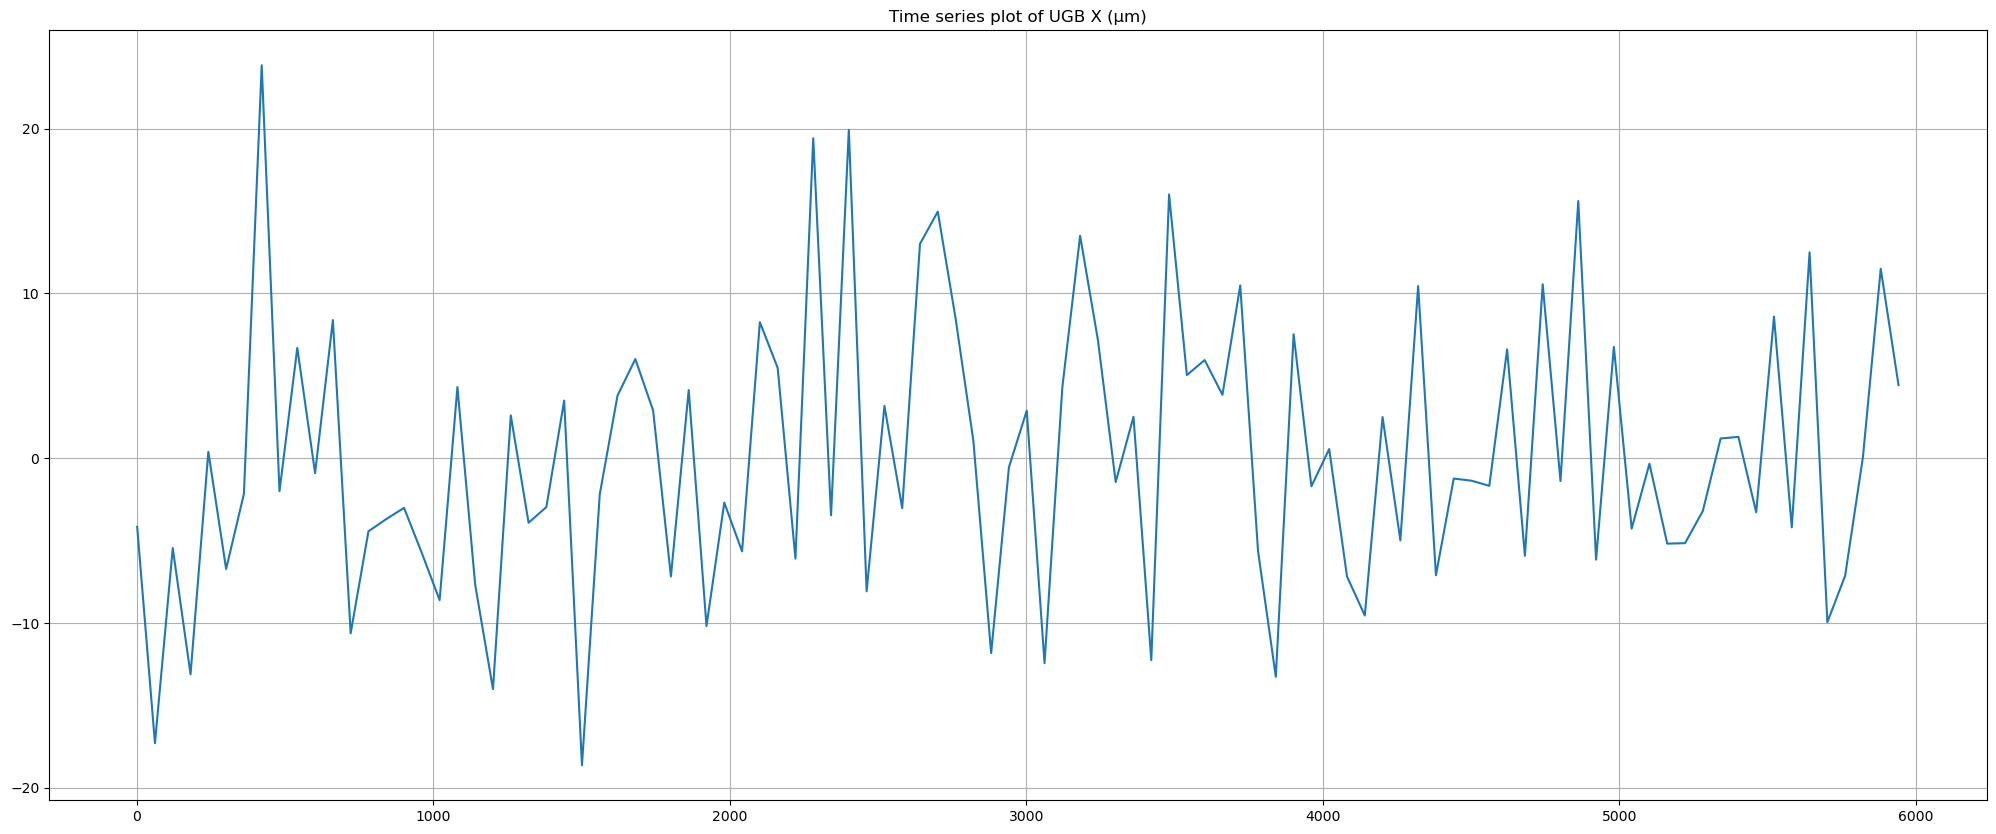

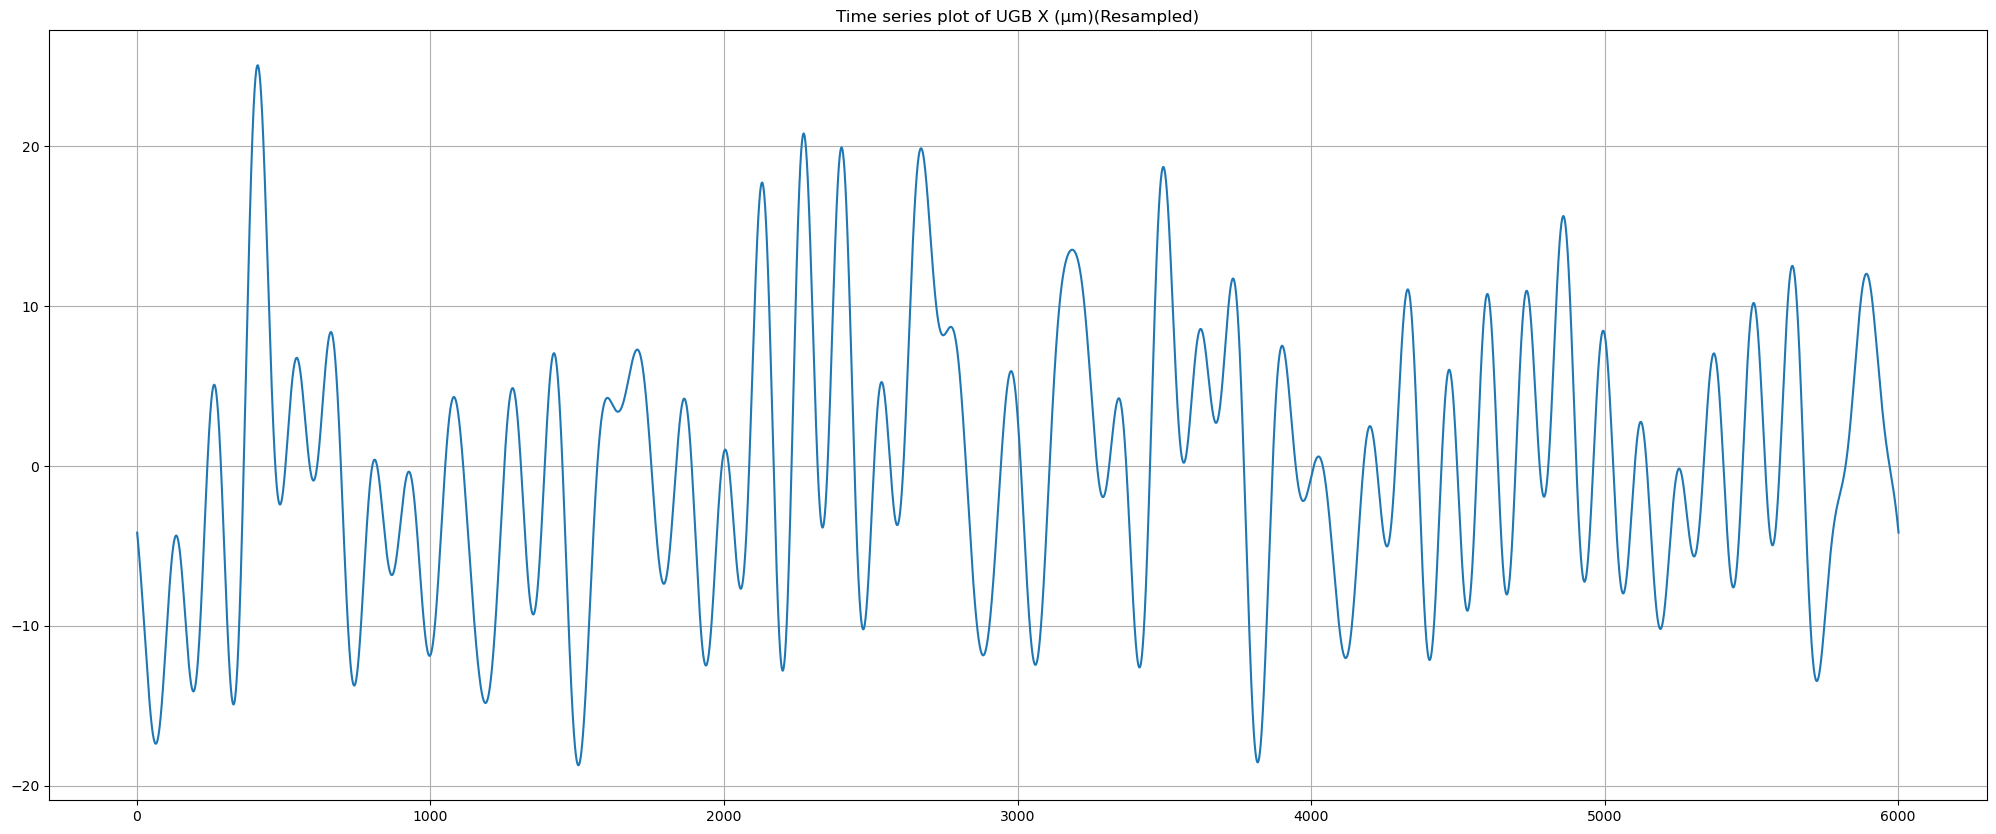

240000


In [189]:
plot_time_series(time_data[0:100], ugb_x)
plot_time_series(time_data_resampled,ugb_x_resampled)

print(len(ugb_x_resampled))

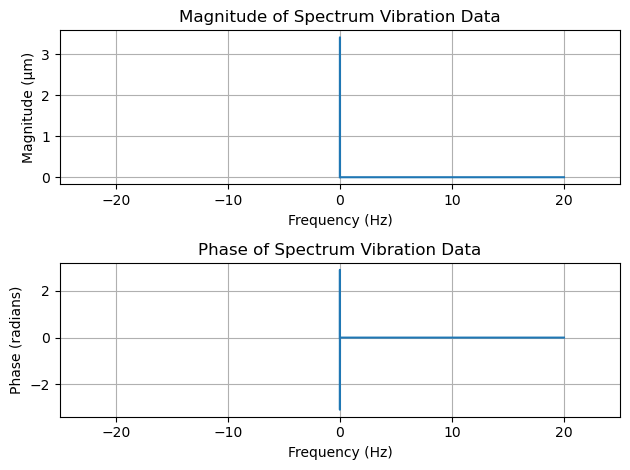

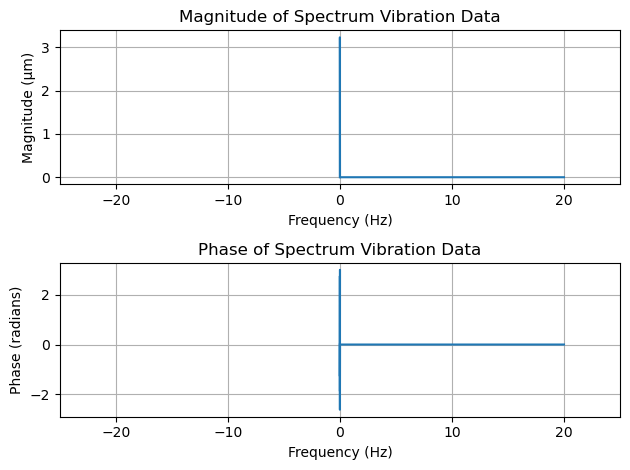

In [194]:
# define spectrum calculation of the displacement data
def fft_signal(time_data, value_data):
    # create window
    # win = np.hanning(len(value_data))
    value_data = value_data - np.mean(value_data)
    
    # create frequency axis data
    freq = np.fft.fftfreq(len(value_data), time_data[1]-time_data[0])

    # apply fft
    spec = (2/len(value_data)) * np.fft.fft(value_data)

    return freq, spec

def plot_spectrum(freq_data, spec_data):
    idx = int(len(freq_data)/2)
    amp = np.abs(spec_data)
    phase = np.angle(spec_data)

    phase[amp < 1] = 0

    fig = plt.figure()
    ax_amp = fig.add_subplot(211)
    ax_amp.plot(freq_data[:idx], amp[:idx])
    ax_amp.set_xlim([-25, 25])
    ax_amp.set_xlabel("Frequency (Hz)")
    ax_amp.set_ylabel(u"Magnitude (\u03bcm)")
    ax_amp.set_title("Magnitude of Spectrum Vibration Data")
    plt.grid(True)

    ax_phase = fig.add_subplot(212)
    ax_phase.plot(freq_data[:idx], phase[:idx])
    ax_phase.set_xlim([-25, 25])
    ax_phase.set_xlabel("Frequency (Hz)")
    ax_phase.set_ylabel(u"Phase (radians)")
    ax_phase.set_title("Phase of Spectrum Vibration Data")
    plt.grid(True)

    plt.tight_layout()

# obtain the spectrum profile of each displacement data
ugb_ovr_x_spec = fft_signal(time_data_resampled, ugb_x_resampled)
ugb_ovr_y_spec = fft_signal(time_data_resampled, ugb_y_resampled)

# plot the spectrum data
plot_spectrum(ugb_ovr_x_spec[0], ugb_ovr_x_spec[1])
plot_spectrum(ugb_ovr_y_spec[0], ugb_ovr_y_spec[1])

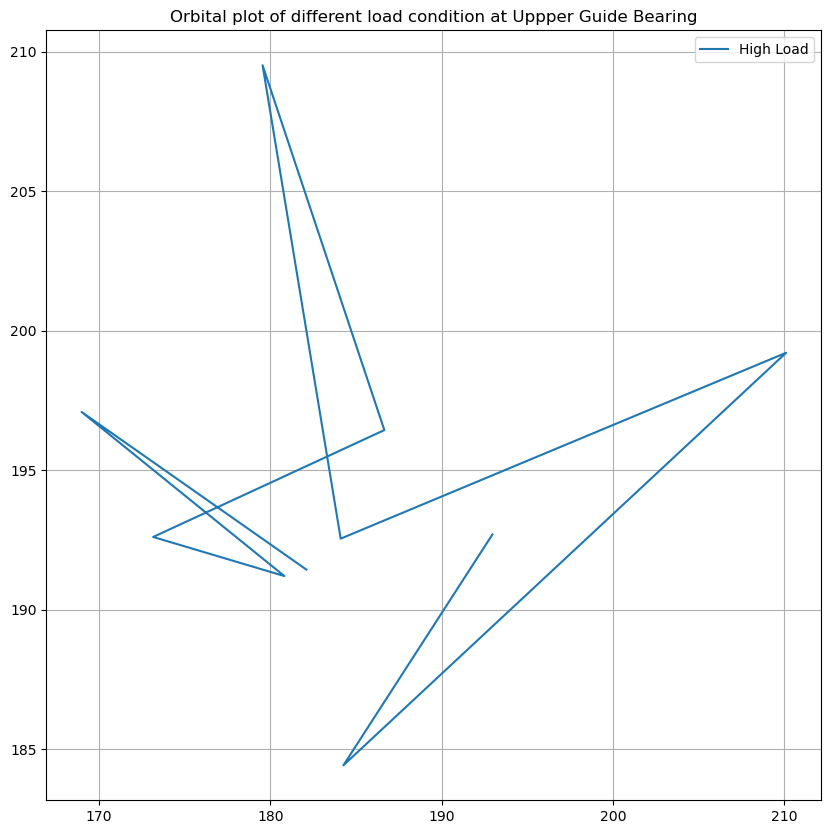

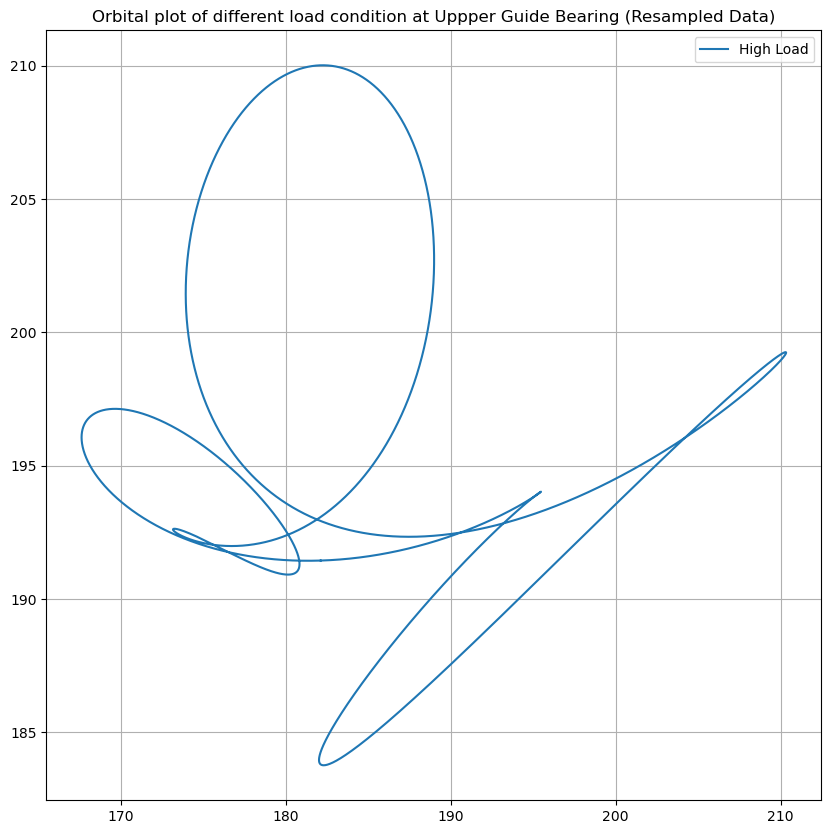

In [179]:
# plot the orbit of data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.plot(ugb_ovr_x, ugb_ovr_y)
ax.plot(ugb_x, ugb_y)
ax.set_title("Orbital plot of different load condition at Uppper Guide Bearing")
ax.legend(['High Load', 'Normal Load', 'Low Load'])
plt.grid()

# plot the orbit of data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.plot(ugb_ovr_x, ugb_ovr_y)
ax.plot(ugb_x_resampled, ugb_y_resampled)
ax.set_title("Orbital plot of different load condition at Uppper Guide Bearing (Resampled Data)")
ax.legend(['High Load', 'Normal Load', 'Low Load'])
plt.grid()

plt.show() 

In [180]:
def square_fft_filter(data_input, time_data, freq_band):
    data_input = data_input - np.mean(data_input)
    win = np.hamming(len(data_input))
    f = np.fft.fftfreq(len(data_input), time_data[1] - time_data[0])
    data_spectrum = 2/len(data_input) * np.fft.fft(data_input)

    indices = (abs(f) >= freq_band[0]) & (abs(f) <= freq_band[1])
    rect_filter = np.zeros_like(data_input)
    rect_filter[indices] = 1
    data_spectrum_filtered = data_spectrum * rect_filter

    data_filtered = np.fft.ifft(data_spectrum_filtered / (2/len(data_input)))
    data_filtered = data_filtered.real
    
    return data_filtered

ugb_x_filtered = square_fft_filter(ugb_x_resampled, time_data_resampled, [3.5, 5.5])
ugb_y_filtered = square_fft_filter(ugb_y_resampled, time_data_resampled, [3.5, 5.5])

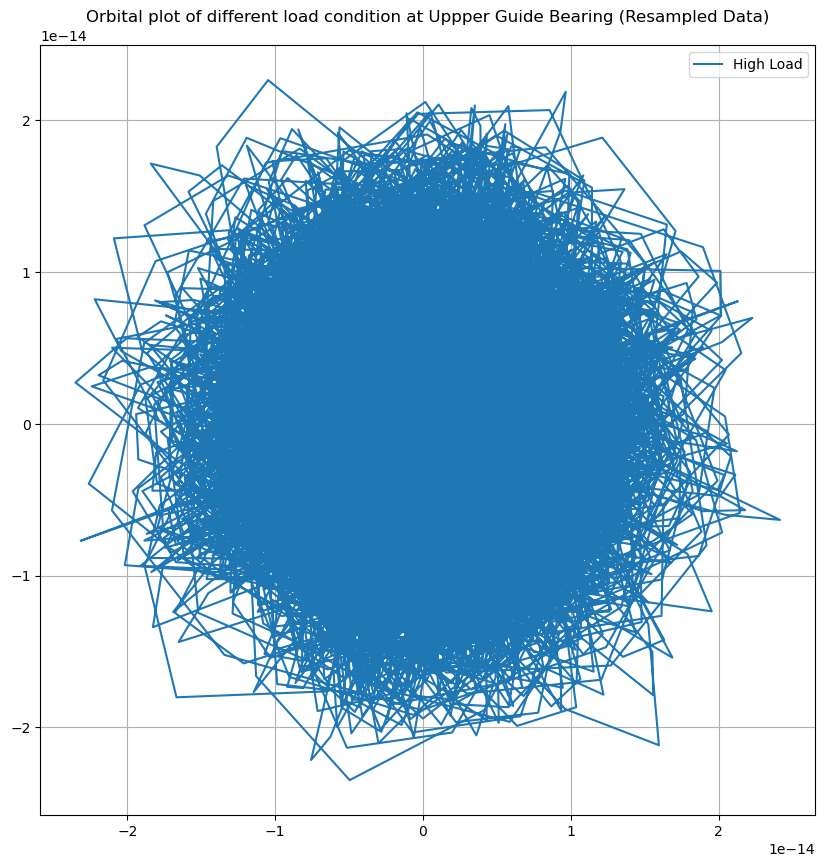

In [181]:
# plot the orbit of data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.plot(ugb_ovr_x, ugb_ovr_y)
ax.plot(ugb_x_filtered, ugb_y_filtered)
ax.set_title("Orbital plot of different load condition at Uppper Guide Bearing (Resampled Data)")
ax.legend(['High Load', 'Normal Load', 'Low Load'])
plt.grid()

plt.show() 

In [ ]:
# create correlation map of data
df = db_data
f = plt.figure(figsize=(40, 30))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Process Vibration Data

In [8]:
# selecting proximity sensor data
vib_idx_name = ['TimeStamp', 'UGB X (µm)', 'UGB Y (µm)', 'TGB X (µm)', 'TGB X (µm)', 'LGB X (µm)', 'LGB X (µm)']
vib_db_data = db_data[vib_idx_name]
vib_db_data

,TimeStamp,UGB X (µm),UGB Y (µm),TGB X (µm),TGB X (µm),LGB X (µm),LGB X (µm)
0,2023-08-01 00:00:01,182.10,191.44,92.29,92.29,117.16,117.16
1,2023-08-01 00:01:01,168.97,197.09,102.89,102.89,111.49,111.49
2,2023-08-01 00:02:01,180.81,191.21,80.90,80.90,118.90,118.90
3,2023-08-01 00:03:01,173.15,192.61,84.62,84.62,108.97,108.97
4,2023-08-01 00:04:01,186.65,196.44,82.11,82.11,110.94,110.94
...,...,...,...,...,...,...,...
44635,2023-08-31 23:55:58,191.27,206.34,117.94,117.94,115.49,115.49
44636,2023-08-31 23:56:58,187.86,198.73,147.65,147.65,114.98,114.98
44637,2023-08-31 23:57:58,191.78,208.65,138.95,138.95,123.37,123.37
44638,2023-08-31 23:58:58,184.54,204.79,119.51,119.51,118.19,118.19


In [9]:
ugb_x = vib_db_data['UGB X (µm)']
ugb_y = vib_db_data['UGB Y (µm)']

In [16]:
# create orbital plot
fig = plt.figure(figsize=(10,10))

fs = 0.6
length = len(vib_db_data)
t = np.arange(0, length, (1/fs))

x0 = []
y0 = []

count = 0

for i in range(len(vib_db_data)):
    count += 1

    x = ugb_x[i]
    y = ugb_y[i]

    

    ax = fig.add_subplot(212)
    ax.scatter(x, y)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title("Overall Orbital Plot")

    if i > 0:
        ax.plot(x0, y0)

    x0.append(x)
    y0.append(y)

    plt.show

    display.clear_output(wait=True)
    display.display(fig)
    time.sleep(0.01)
    plt.clf()

KeyboardInterrupt: 

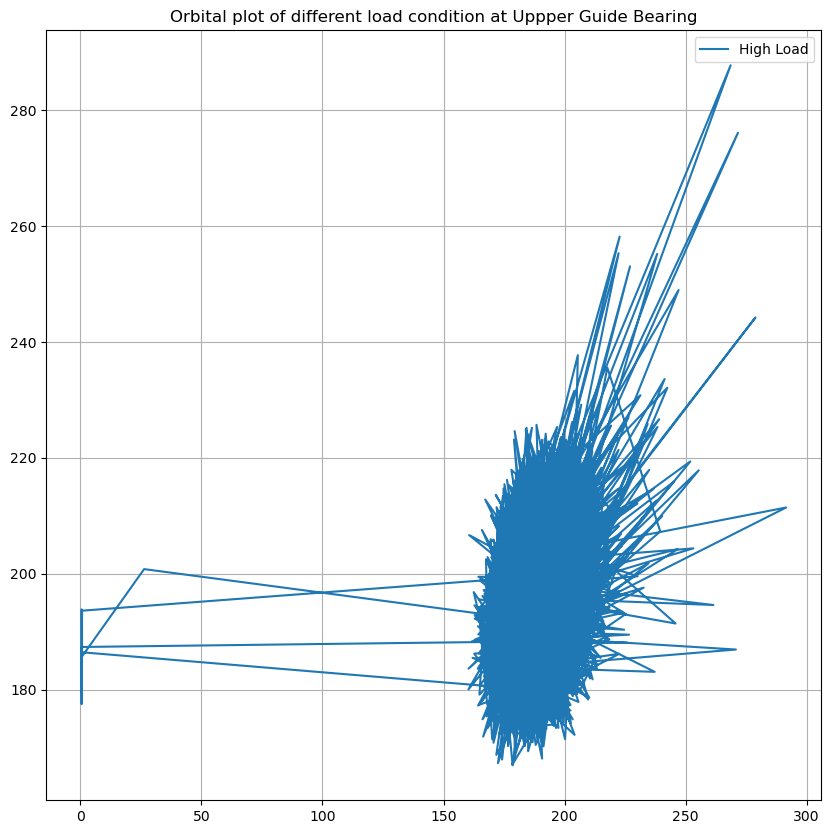

In [7]:
# plot the orbit of data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.plot(ugb_ovr_x, ugb_ovr_y)
ax.plot(ugb_x, ugb_y)
ax.set_title("Orbital plot of different load condition at Uppper Guide Bearing")
ax.legend(['High Load', 'Normal Load', 'Low Load'])
plt.grid()

plt.show() 

## Data Filtering Trial

200


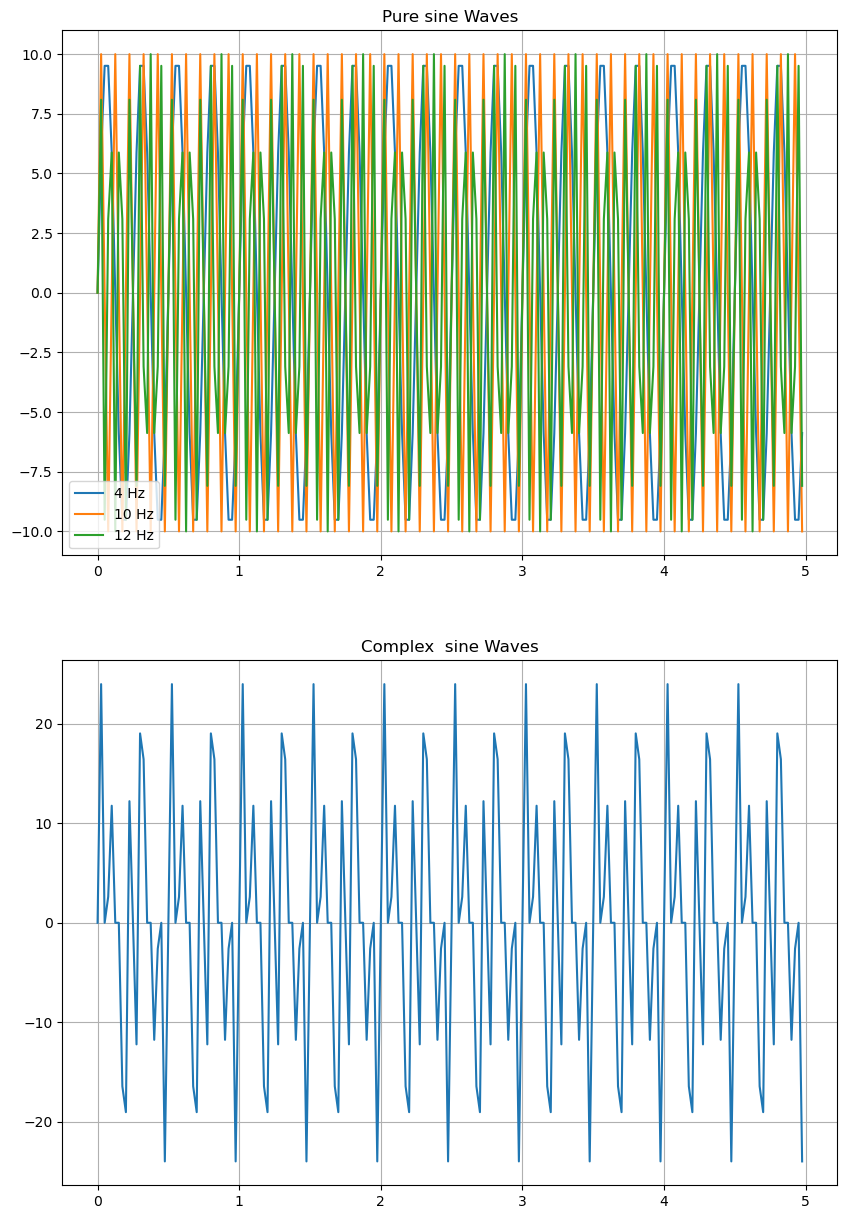

In [141]:
# creating sine waves
amp = 10
f1 = 4
f2 = 10
f3 = 14
fs = 40
t = np.arange(0, 5, 1/fs)

x1 = amp * np.sin(2 * np.pi * f1 * t)
x2 = amp * np.sin(2 * np.pi * f2 * t)
x3 = amp * np.sin(2 * np.pi * f3 * t)

x = x1 + x2 + x3
print(len(x))
# plot the time series of data
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211)
ax.plot(t, x1)
ax.plot(t, x2)
ax.plot(t, x3)
ax.set_title("Pure sine Waves")
ax.legend(['4 Hz', '10 Hz', '12 Hz'])
plt.grid()

ax = fig.add_subplot(212)
ax.plot(t, x)
ax.set_title("Complex  sine Waves")
plt.grid()

plt.show() 

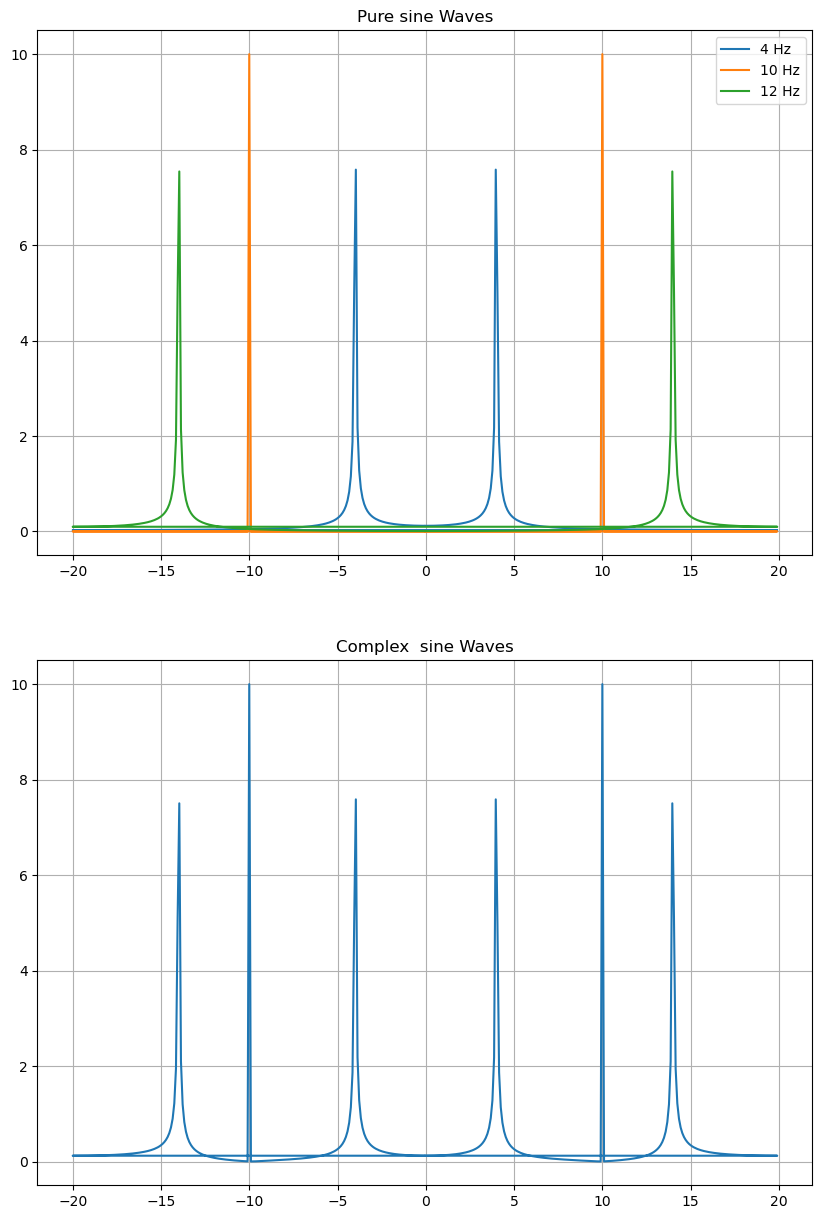

In [26]:
# bring to frequency domain
# nfft = int(pow(2, np.ceil(np.log2(len(x)))))
win = np.hamming(len(x))
# f = (fs/2) * np.arange(0,1,1/(nfft/2+1))
f = np.fft.fftfreq(len(x), t[1] - t[0])

X = 2/len(x) * np.fft.fft(x)
X1 = 2/len(x) * np.fft.fft(x1)
X2 = 2/len(x) * np.fft.fft(x2)
X3 = 2/len(x) * np.fft.fft(x3)

# plot the spectrum of data
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211)
ax.plot(f, abs(X1))
ax.plot(f, abs(X2))
ax.plot(f, abs(X3))
ax.set_title("Pure sine Waves")
ax.legend(['4 Hz', '10 Hz', '12 Hz'])
plt.grid()

ax = fig.add_subplot(212)
ax.plot(f, abs(X))
ax.set_title("Complex  sine Waves")
plt.grid()

plt.show() 

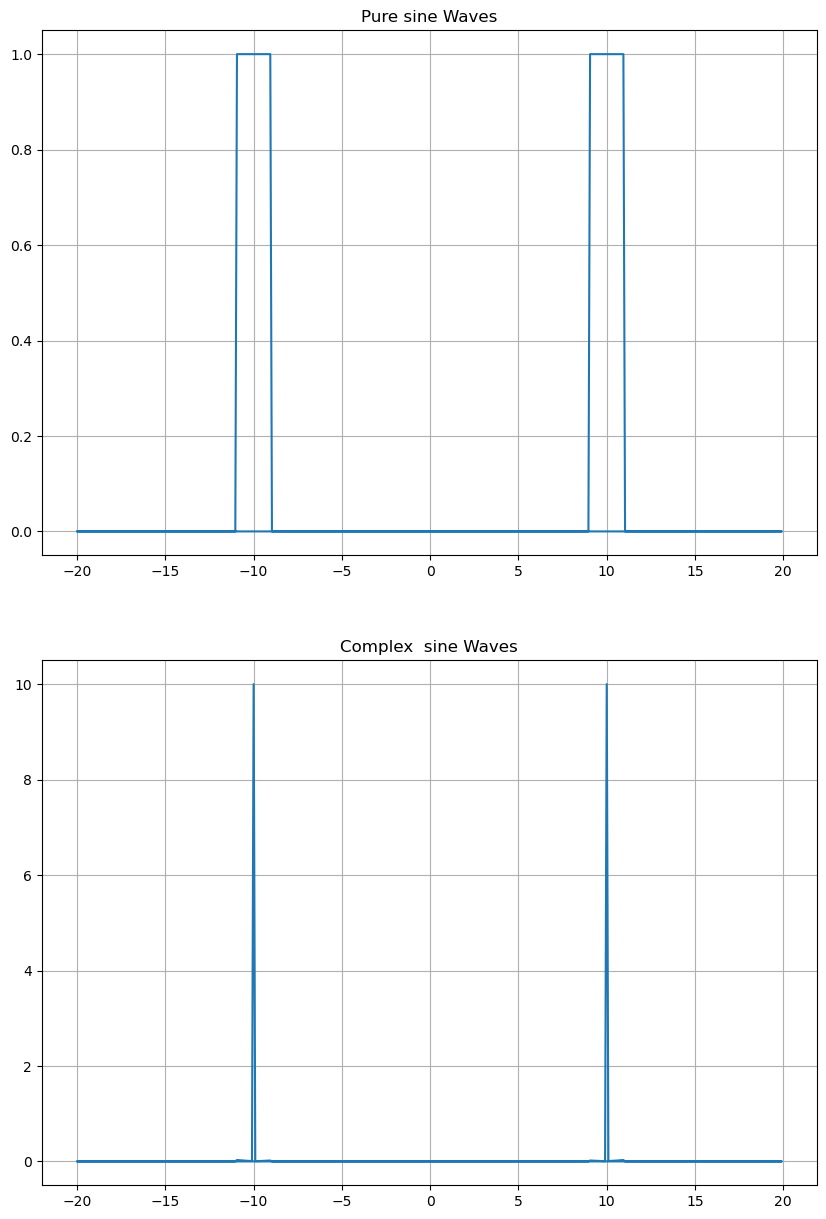

In [27]:
# apply rectangular filter
indices = (abs(f) >= 9) & (abs(f) <= 11)
rect_filter = np.zeros_like(x)
rect_filter[indices] = 1
X_filtered = X * rect_filter

# plot the filtered spectrum of data
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211)
ax.plot(f, rect_filter)
ax.set_title("Pure sine Waves")
plt.grid()

ax = fig.add_subplot(212)
ax.plot(f, abs(X_filtered))
ax.set_title("Complex  sine Waves")
plt.grid()

plt.show() 


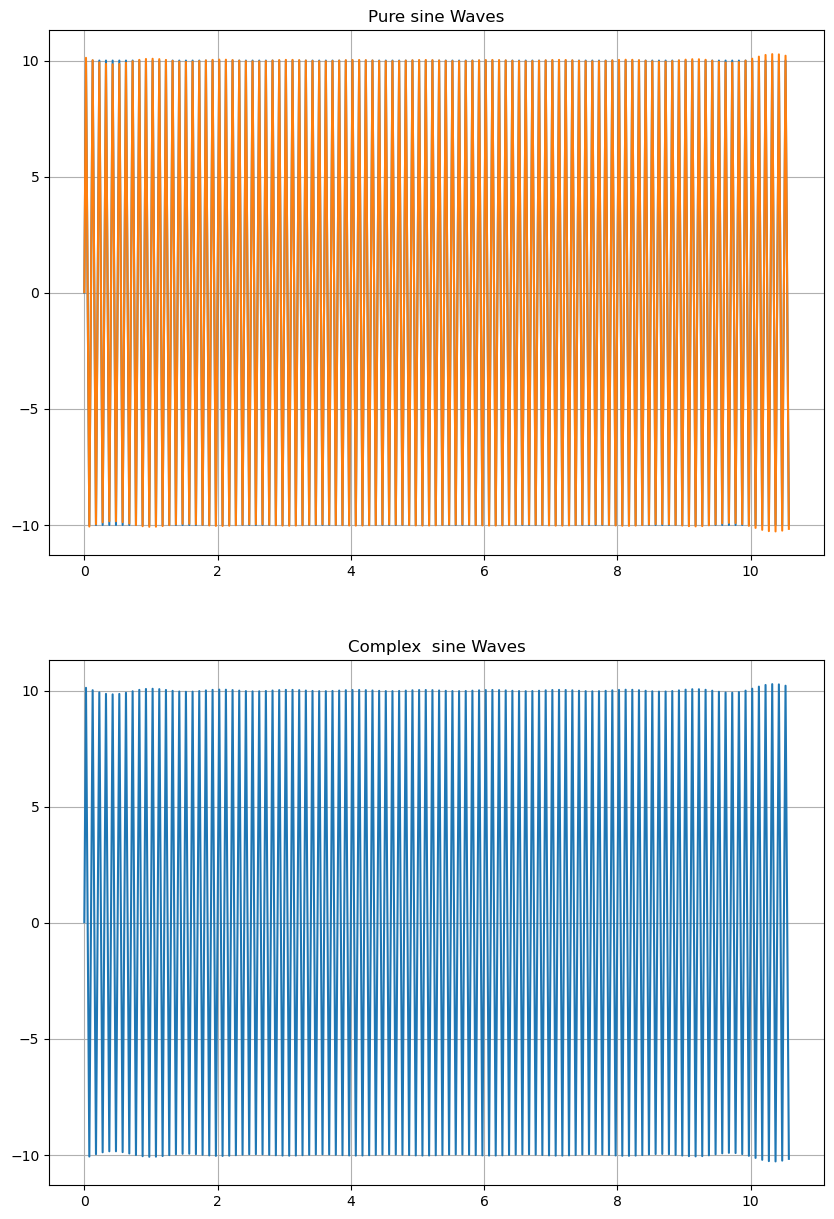

0.050699408193966934

In [28]:
# apply invers FFT
x_filtered = np.fft.ifft(X_filtered / (2/len(x)))
x_filtered = x_filtered.real

# plot the filtered waveform of data
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211)
ax.plot(t, x2)
ax.plot(t, x_filtered)
ax.set_title("Pure sine Waves")
plt.grid()

ax = fig.add_subplot(212)
ax.plot(t, x_filtered)
ax.set_title("Complex  sine Waves")
plt.grid()

plt.show()

np.sqrt(((x2-x_filtered)**2).mean())

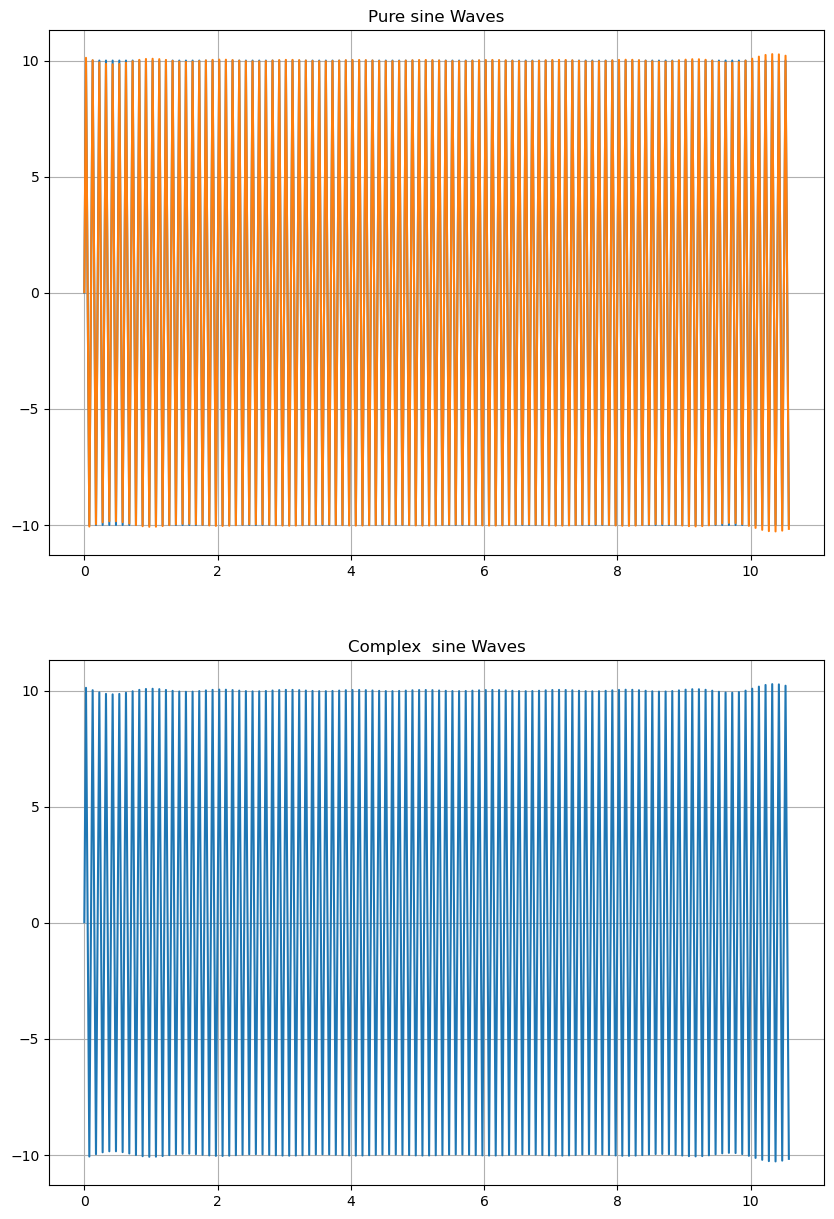

In [29]:
def square_fft_filter(data_input, time_data, freq_band):
    win = np.hamming(len(data_input))
    f = np.fft.fftfreq(len(x), time_data[1] - time_data[0])
    data_spectrum = 2/len(data_input) * np.fft.fft(data_input)

    indices = (abs(f) >= freq_band[0]) & (abs(f) <= freq_band[1])
    rect_filter = np.zeros_like(data_input)
    rect_filter[indices] = 1
    data_spectrum_filtered = data_spectrum * rect_filter

    data_filtered = np.fft.ifft(data_spectrum_filtered / (2/len(data_input)))
    data_filtered = data_filtered.real
    
    return data_filtered

data_filtered = square_fft_filter(x, t, [9, 11])

# plot the filtered waveform of data
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211)
ax.plot(t, x2)
ax.plot(t, data_filtered)
ax.set_title("Pure sine Waves")
plt.grid()

ax = fig.add_subplot(212)
ax.plot(t, data_filtered)
ax.set_title("Complex  sine Waves")
plt.grid()

plt.show()

[ 9.6875 10.     10.3125]


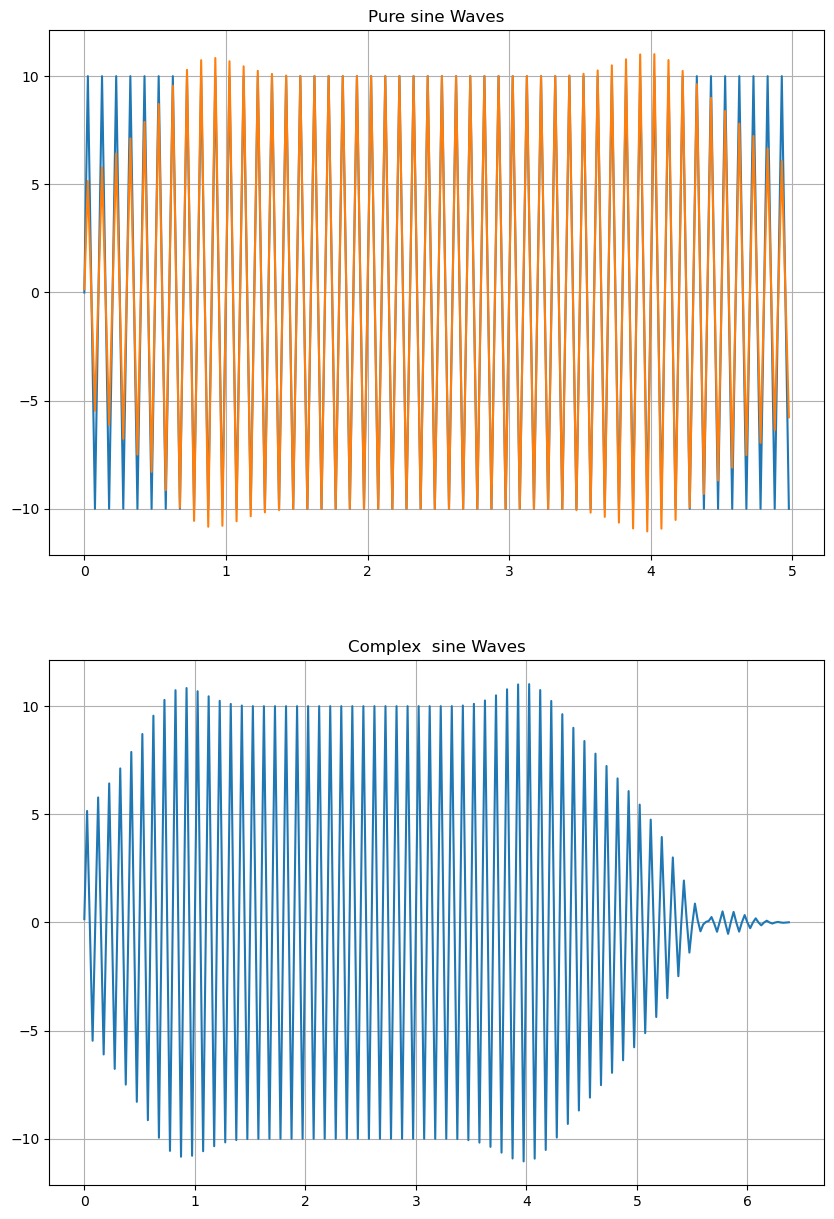

0.15244861028405143

In [164]:
# apply the STFT
f, txx, Zxx = scipy.signal.stft(x, fs, window='hann', nperseg=128, noverlap=64, nfft=128, return_onesided=True)

indices = (abs(f) >= 9.6) & (abs(f) <= 10.5)
rect_filter = np.zeros_like(Zxx)
rect_filter[indices,:] = 1
Zxx = Zxx * rect_filter

print(f[indices])

t_inv, x2_inv = scipy.signal.istft(Zxx, fs, window='hann', nperseg=128, noverlap=64, nfft=128, input_onesided=True)


# plot the filtered waveform of data
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211)
ax.plot(t, x2)
ax.plot(t_inv[:len(t)], x2_inv[:len(x2)])
ax.set_title("Pure sine Waves")
plt.grid()

ax = fig.add_subplot(212)
ax.plot(t_inv, x2_inv)
ax.set_title("Complex  sine Waves")
plt.grid()

plt.show()

np.sum(x2-x2_inv[:len(x2)])

In [146]:
signal.check_COLA(signal.windows.hann(128, sym=False), 128, 64)

True

## Data Comparison between PI and VibroSight

In [29]:
# import necessary packages
import numpy as np 
import pandas as pd 
import scipy.signal as sig 
import matplotlib.pyplot as plt


In [2]:


# load vibrosight data on 2023-10-11 at 04.07.48 PM
data_vs = pd.read_excel("LGS1_VibrationWaveform_20231011_VibroSight.xlsx", "Waveform Plot")
data_vs

,Sample,UGB-X-Time,UGB-X-Rev,UGB-X-Orientation,UGB-X-Disp,UGB-Y-Time,UGB-Y-Rev,UGB-Y-Orientation,UGB-Y-Disp
0,0.0,-0.00150,-0.006901,35.324900,-34.41893,-0.00150,-0.006901,125.32480,-3.693618
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.00100,0.004601,31.184410,-30.30944,0.00100,0.004601,121.18430,-6.841069
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12232,4091.0,10.22579,47.044990,16.561970,-29.80631,10.22579,47.044990,106.56200,-16.342080
12233,4092.0,10.22828,47.056490,12.421480,-25.27977,10.22828,47.056490,102.42140,-20.385890
12234,4093.0,10.23078,47.067990,8.280991,-24.07545,10.23078,47.067990,98.28098,-24.051170
12235,4094.0,10.23328,47.079490,4.140495,-23.59954,10.23328,47.079490,94.14047,-24.767920


In [3]:
# checking all columns contains NaN
print(data_vs.isnull().sum())
 
# clear all column with NaN input
data_vs = data_vs.dropna(axis=0)
data_vs = data_vs.dropna(axis=1)
data_vs

Sample               8141
UGB-X-Time           8141
UGB-X-Rev            8141
UGB-X-Orientation    8141
UGB-X-Disp           8141
UGB-Y-Time           8141
UGB-Y-Rev            8141
UGB-Y-Orientation    8141
UGB-Y-Disp           8141
dtype: int64


,Sample,UGB-X-Time,UGB-X-Rev,UGB-X-Orientation,UGB-X-Disp,UGB-Y-Time,UGB-Y-Rev,UGB-Y-Orientation,UGB-Y-Disp
0,0.0,-0.00150,-0.006901,35.324900,-34.41893,-0.00150,-0.006901,125.32480,-3.693618
3,1.0,0.00100,0.004601,31.184410,-30.30944,0.00100,0.004601,121.18430,-6.841069
6,2.0,0.00350,0.016102,27.043910,-30.45066,0.00350,0.016102,117.04390,-7.579521
9,3.0,0.00600,0.027603,22.903420,-36.74444,0.00600,0.027603,112.90340,-5.712618
12,4.0,0.00850,0.039105,18.762920,-31.22911,0.00850,0.039105,108.76290,-15.479880
...,...,...,...,...,...,...,...,...,...
12232,4091.0,10.22579,47.044990,16.561970,-29.80631,10.22579,47.044990,106.56200,-16.342080
12233,4092.0,10.22828,47.056490,12.421480,-25.27977,10.22828,47.056490,102.42140,-20.385890
12234,4093.0,10.23078,47.067990,8.280991,-24.07545,10.23078,47.067990,98.28098,-24.051170
12235,4094.0,10.23328,47.079490,4.140495,-23.59954,10.23328,47.079490,94.14047,-24.767920


In [55]:
# import PI Data on the same timeframe
import sys 

sys.path.append("../../PredictPIServer/ValePredictPI/")

from vale_connect import ValeConnect

# create connection
server_root = '142.40.33.208'
server_base = 'pti-pi'
x_tag = ['U-LGS1-UGB-X-PK-PK-70-AI','U-LGS1-UGB-Y-PK-PK-340-AI']
time_list = ['2023-10-11 16:07:48','2023-10-11 16:08:58']

conn = ValeConnect(server_root, server_base)

for i in range(len(x_tag)):
    x_tag_wid = conn.get_webid_point(x_tag[i])
    value_resp = conn.get_stream_rec_valuetimestamp_pd(x_tag_wid, time_list)

    if i==0:
        data_pi = value_resp
    else:
        data_pi.insert(i+1, "Values " + str(i), value_resp['Values'])

data_pi

,Timestamps,Values,Values 1
0,2023-10-11T16:07:50.0298919Z,192.7,196.700000
1,2023-10-11T16:08:00.0284576Z,212.7,198.900009
2,2023-10-11T16:08:10.0280303Z,218.5,204.700000
3,2023-10-11T16:08:20.0216064Z,205.0,185.200000
4,2023-10-11T16:08:30.026184Z,210.1,213.700000
5,2023-10-11T16:08:40.0277557Z,207.6,208.400009
6,2023-10-11T16:08:50.0263214Z,188.7,195.800000


In [49]:
h = data_pi['Timestamps'][0][11:13]
h = float(h)
m = data_pi['Timestamps'][0][14:16]
m = float(m)
s = data_pi['Timestamps'][0][17:27]
s = float(s)

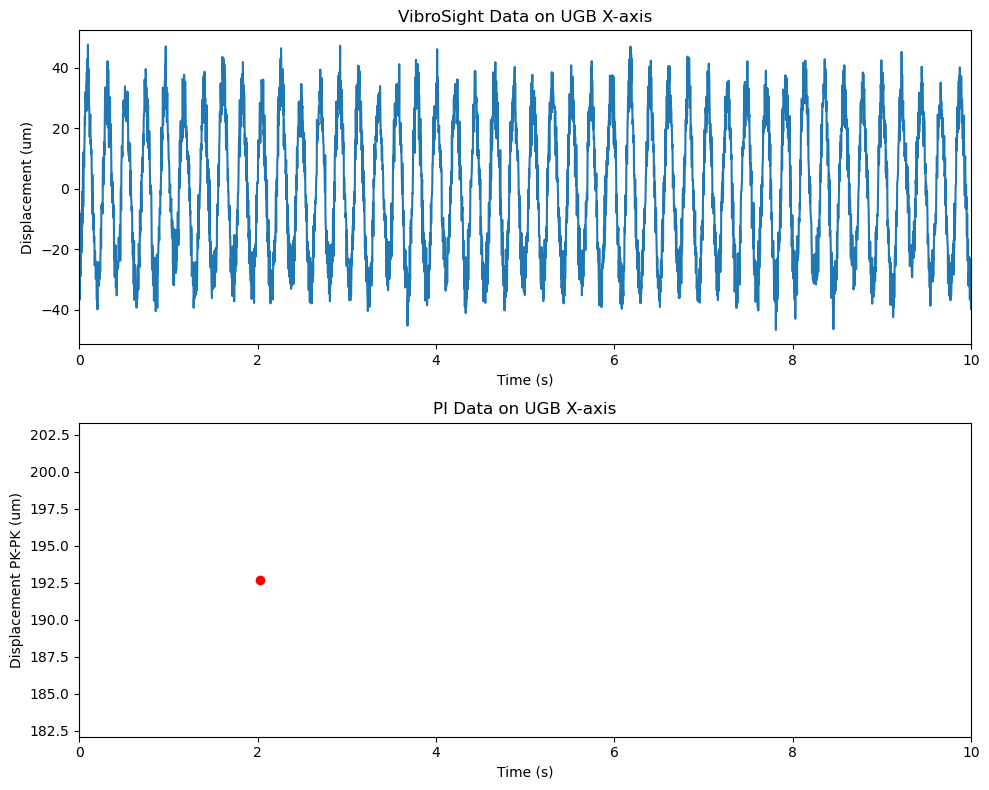

In [53]:
# comparing the data

x_pi = data_pi['Values']
y_pi = data_pi['Values 1']
t_pi = s - 48

x_vs = data_vs['UGB-X-Disp']
y_vs = data_vs['UGB-Y-Disp']
t_vs = data_vs['UGB-X-Time']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(211)
ax.plot(t_vs, x_vs)
ax.set_xlabel("Time (s)")
ax.set_xlim([0, 10])
ax.set_ylabel("Displacement (um)")
ax.set_title("VibroSight Data on UGB X-axis")

ax = fig.add_subplot(212)
ax.plot(t_pi, x_pi, 'ro')
ax.set_xlabel("Time (s)")
ax.set_xlim([0, 10])
ax.set_ylabel("Displacement PK-PK (um)")
ax.set_title("PI Data on UGB X-axis")

fig.tight_layout()

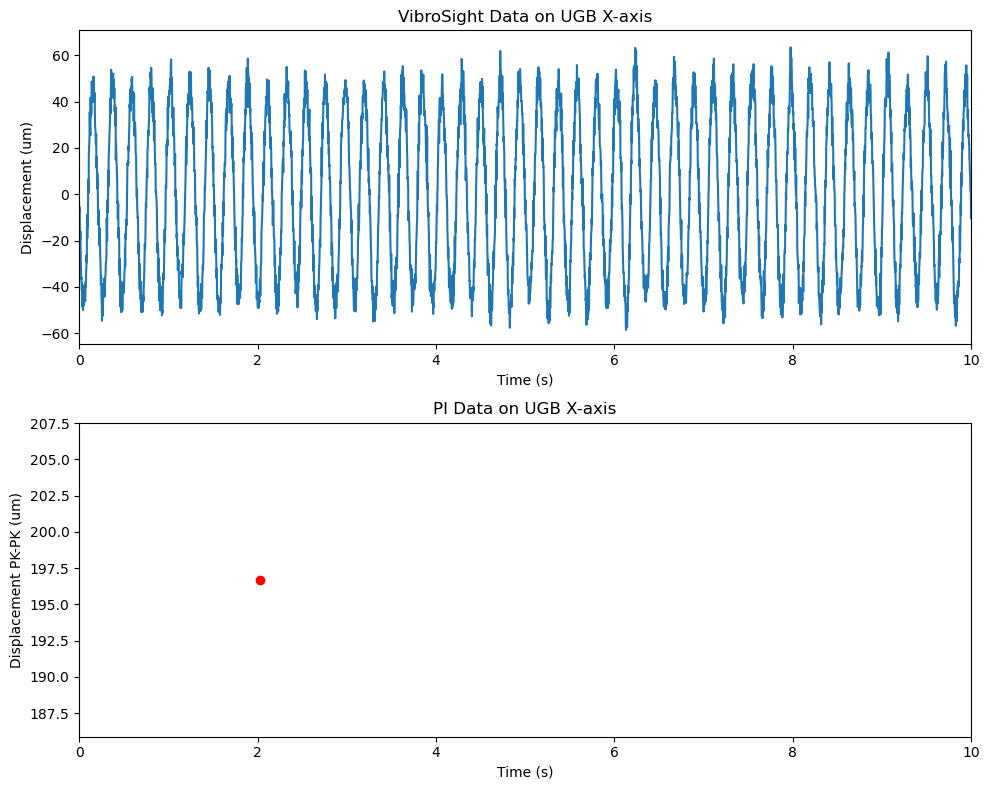

In [54]:
# comparing the data

x_pi = data_pi['Values']
y_pi = data_pi['Values 1']
t_pi = s - 48

x_vs = data_vs['UGB-X-Disp']
y_vs = data_vs['UGB-Y-Disp']
t_vs = data_vs['UGB-X-Time']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(211)
ax.plot(t_vs, y_vs)
ax.set_xlabel("Time (s)")
ax.set_xlim([0, 10])
ax.set_ylabel("Displacement (um)")
ax.set_title("VibroSight Data on UGB X-axis")

ax = fig.add_subplot(212)
ax.plot(t_pi, y_pi, 'ro')
ax.set_xlabel("Time (s)")
ax.set_xlim([0, 10])
ax.set_ylabel("Displacement PK-PK (um)")
ax.set_title("PI Data on UGB X-axis")

fig.tight_layout()